# 3.2 The first order optimality condition

- In this Section we discuss the foundational first order concept on which many practical optimization algorithms are built: the first order optimality condition.  


- This is the first order analog of the zero order condition discussed in the previous Chapter.


- The first order condition codifies the consistent behavior of how any differentiable function's first derivative(s) behave at its minima and maxima.  

- You can toggle the code on and off in this presentation via the button below.

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [1]:
## This code cell will not be shown in the HTML version of this notebook
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import basics_library as baslib
from mlrefined_libraries import calculus_library as calib
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np

# import custom plotting tools
from mlrefined_libraries import math_optimization_library as optlib
static_plotter = optlib.static_plotter.Visualizer();
anime_plotter = optlib.animation_plotter.Visualizer();

# This is needed to compensate for matplotlib notebook's tendancy to blow up images when plotted inline
%matplotlib notebook
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

## The first-order condition

- Below we plot a quadratic functions in two and three dimensions, and mark the global minimum point on each with a green point.  


- In each panel we also draw the first order Taylor series approximation - a tangent line/hyperplane - generated by the first derivative(s) at the function's minimum value.


- In terms of the behavior of the first order derivatives here we see - in both instances - that the tangent line/hyperplane is perfectly flat, indicating that the first derivative(s) is exactly zero at the function's minimum.  

<IPython.core.display.Javascript object>


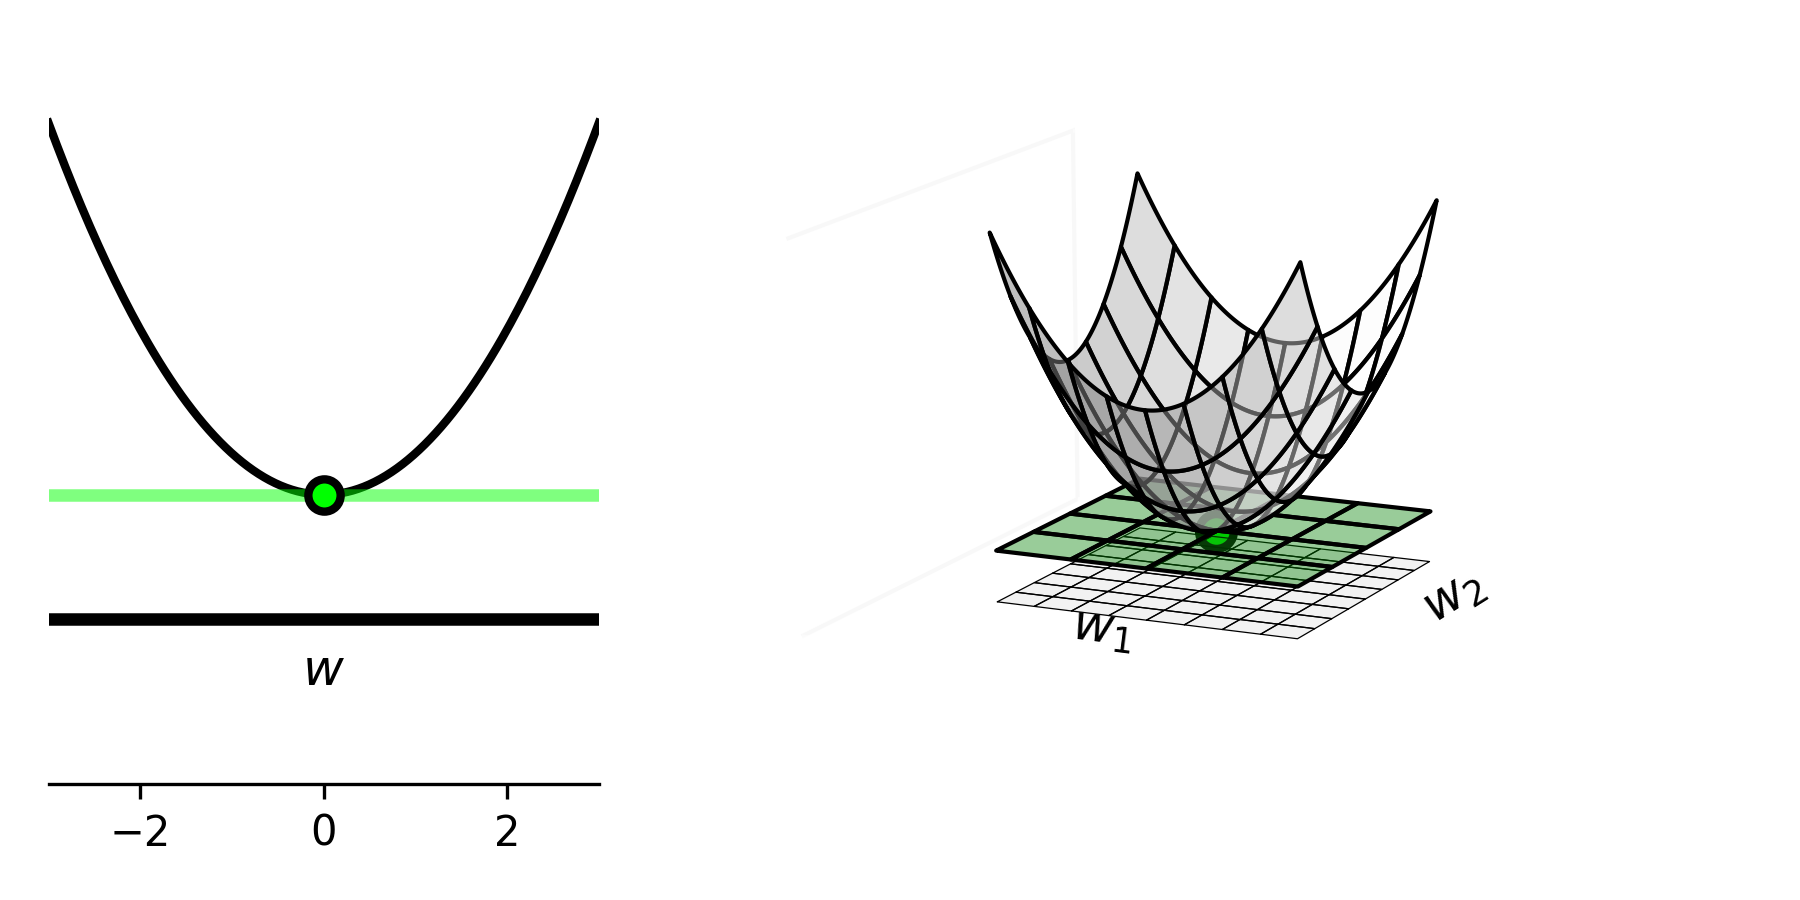

In [10]:
# This code cell will not be shown in the HTML version of this notebook
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: w**2  + 3
func2 = lambda w: w[0]**2 + w[1]**2  + 3

# use custom plotter to show both functions
calib.derivative_visualizer.compare_2d3d(func1 = func1,func2 = func2)

- This sort of first order behavior is universal regardless of the function one examines and - moreover - it holds regardless of the dimension of a function's input.


- That is, first order derivatives are always zero at the minima of a function.  


- This is because minimum values of a function are naturally located at 'valley floors' where a tangent line or hyperplane tangent to the function is perfectly flat, and thus has zero-valued slope(s).

- Codifying this in the language of mathematics, when $N=1$ any point $v$ where 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d}w}g\left(v\right)=0
\end{equation}

is a potential minimum. 

- Analogously with general $N$ dimensional input, any $N$ dimensional point $\mathbf{v}$ where *every* partial derivative of $g$ is zero, that is

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{v})=0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{v})=0\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{v})=0
\end{array}
\end{equation}

is a potential minimum. 

- This system of $N$ equations is naturally referred to as the *first order system of equations*.  


- We can write the first order system more compactly using gradient notation as 

\begin{equation}
\nabla g\left(\mathbf{v}\right)=\mathbf{0}_{N\times1}.
\end{equation}

- *In principle* this is a very useful characterization of minimum points.


-  It gives us a concrete alternative to seeking out a function's minimum points *directly* via some zero-order approach.


- The alternative - solve a function's first order system of equations.

- However two problems with the first order characterization of minima.  


- First off, with few exceptions it is virtually impossible to solve a general function's first order systems of equations 'by hand'.   


- That is, to solve such equations algebraically for 'closed form' solutions one can write out on paper.  

- The other problem: the *first order optimality condition* does not  define only minima of a function, but other points as well.  


- The first order condition also equally characterizes *maxima* and *saddle points* of a function -  as we see in a few simple examples below.

#### <span style="color:#a50e3e;">Example. </span> Finding points of zero derivative for single-input functions graphically

- Below we plot the three functions

\begin{equation}
\begin{array}
\
g(w) = \text{sin}\left(2w\right) \\
g(w) = w^3 \\
g(w) = \text{sin}\left(3w\right) + 0.1w^2
\end{array}
\end{equation}

- For each we mark all the zero derivative points in green and draw the first order Taylor series approximations/tangent line. 


- Below each function we plot its first derivative, highlighting the points where it takes on the value zero as well. 

<IPython.core.display.Javascript object>


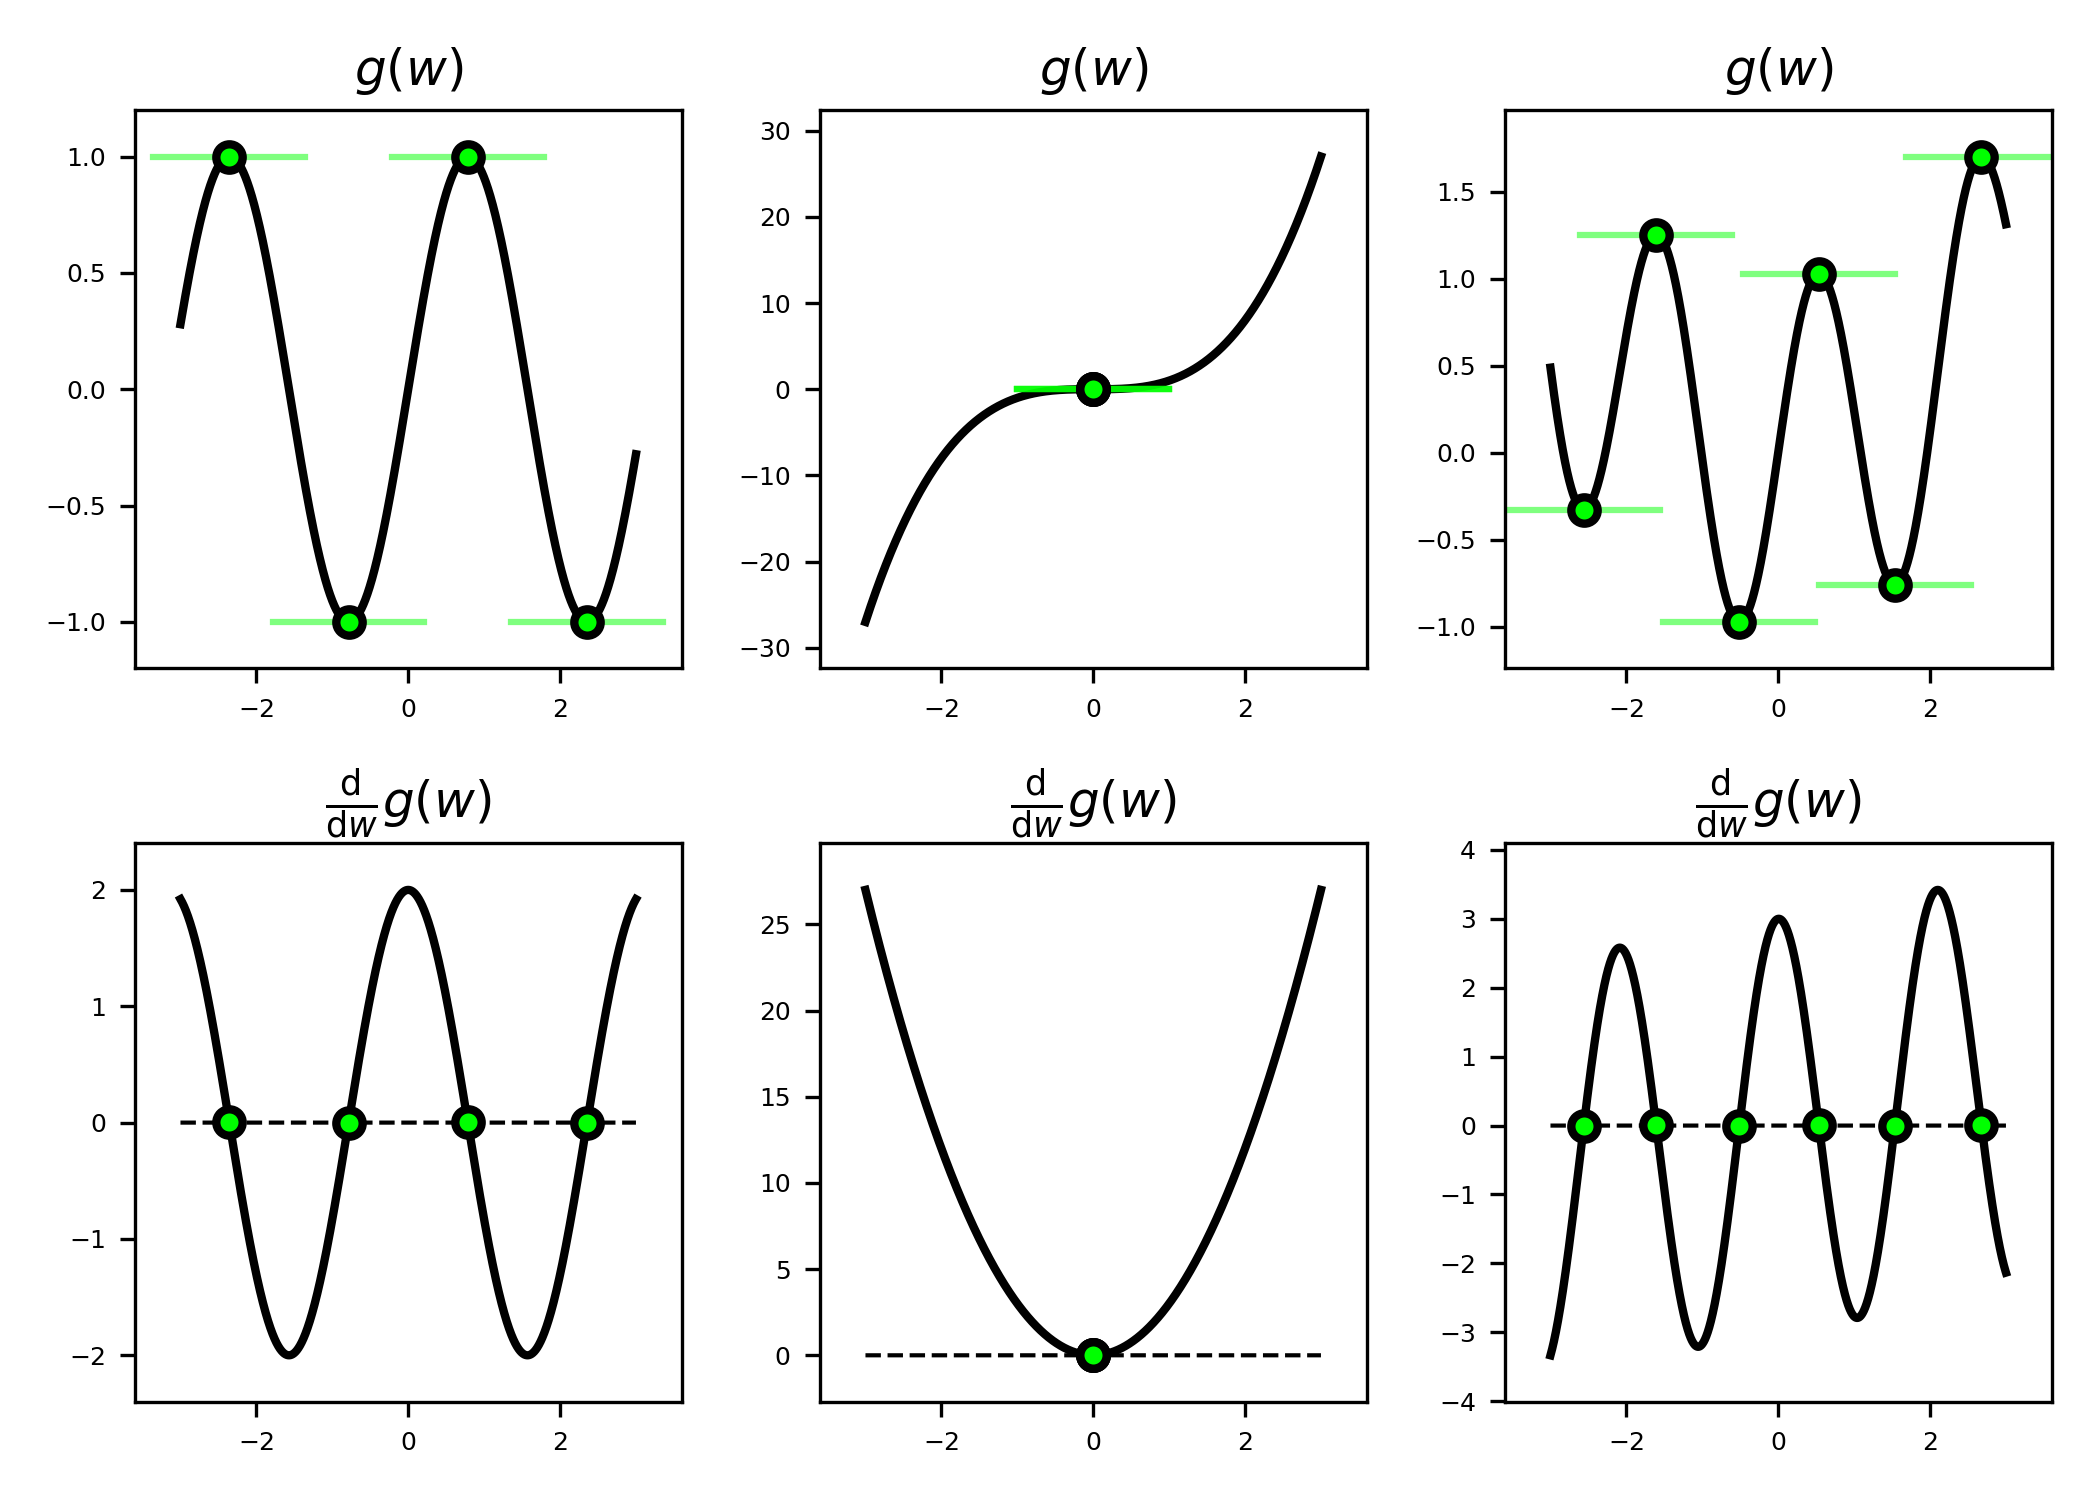

In [6]:
# This code cell will not be shown in the HTML version of this notebook
# plot a single input quadratic in both two and three dimensions
func1 = lambda w: np.sin(2*w)
func2 = lambda w: w**3
func3 = lambda w: np.sin(3*w) + 0.1*w**2

# use custom plotter to show both functions
calib.derivative_visualizer.show_stationary(func1 = func1,func2 = func2,func3 = func3)

- *local minima* or points that are the smallest with respect to their immediate neighbors, like the one around the input value $w=2$ in the right panel


- *local and global maxima* or points that are the largest with respect to their immediate neighbors, like the one around the input value $w=-2$ in the right panel


- *saddle points* like the one shown in the middle panel, that are neither maximal nor minimal with respect to their immediate neighbors

- The previous example illustrate the full swath of points having zero-valued derivative(s).


- This includes multi-input functions as well *regardless of dimension*.  


- Taken together all such points are collectively referred to as *stationary points* or *critical points*.

## Special cases where the first order system can be solved 'by hand'

- There are a handful of relatively simple but important examples where one can compute the solution to a first order system by hand.


- Or, at least, one can show algebraically that they reduce to a *linear system of equations* which can be easily solved numerically.  

#### <span style="color:#a50e3e;">Example. </span> Calculating stationary points of some single-input functions algebraically

- In this Example we use the first order condition for optimality to compute stationary points of the functions 

\begin{equation}
\begin{array}\\
g\left(w\right)=w^{3} \\
g\left(w\right)=e^{w} \\
g\left(w\right)=\textrm{sin}\left(w\right)\\
g\left(w\right)=a + bw + cw^{2}, \,\,\,c>0 \\
\end{array}
\end{equation}

- $g\left(w\right)=w^{3}$, plotted in the middle panel of the second figure above, the first order condition gives $g'\left(v\right)=3v^{2}=0$ which we can visually identify as a saddle point at $v=0$.


- $g\left(w\right)=e^{w}$, the first order condition gives $g'\left(v\right)=e^{v}=0$ which is only satisfied as $v$ goes to $-\infty$, giving a minimum.

- $g\left(w\right)=\mbox{sin}\left(w\right)$ the first order condition gives stationary points wherever $g'\left(v\right)=\mbox{cos}\left(v\right)=0$
which occurs at odd integer multiples of $\frac{\pi}{2}$, i.e., maxima at $v=\frac{\left(4k+1\right)\pi}{2}$ and minima at $v=\frac{\left(4k+3\right)\pi}{2}$
where $k$ is any integer. 


- $g\left(w\right)=w^{2}$ for which the first order condition gives $g'\left(v\right)=2cv + b =0$ with a minimum
at $v=\frac{-b}{2c}$.

#### <span style="color:#a50e3e;">Example. </span> A simple looking function with difficult to compute (algebraically) global minimum

- Solving the first order equation for even a simple looking function can be quite challenging.


- Take, for example, the simple degree four polynomial

\begin{equation}
g(w) = \frac{1}{50}\left(w^4 + w^2 + 10w\right)
\end{equation}



- This is plotted over a short range of inputs containing its global minimum below.

<IPython.core.display.Javascript object>


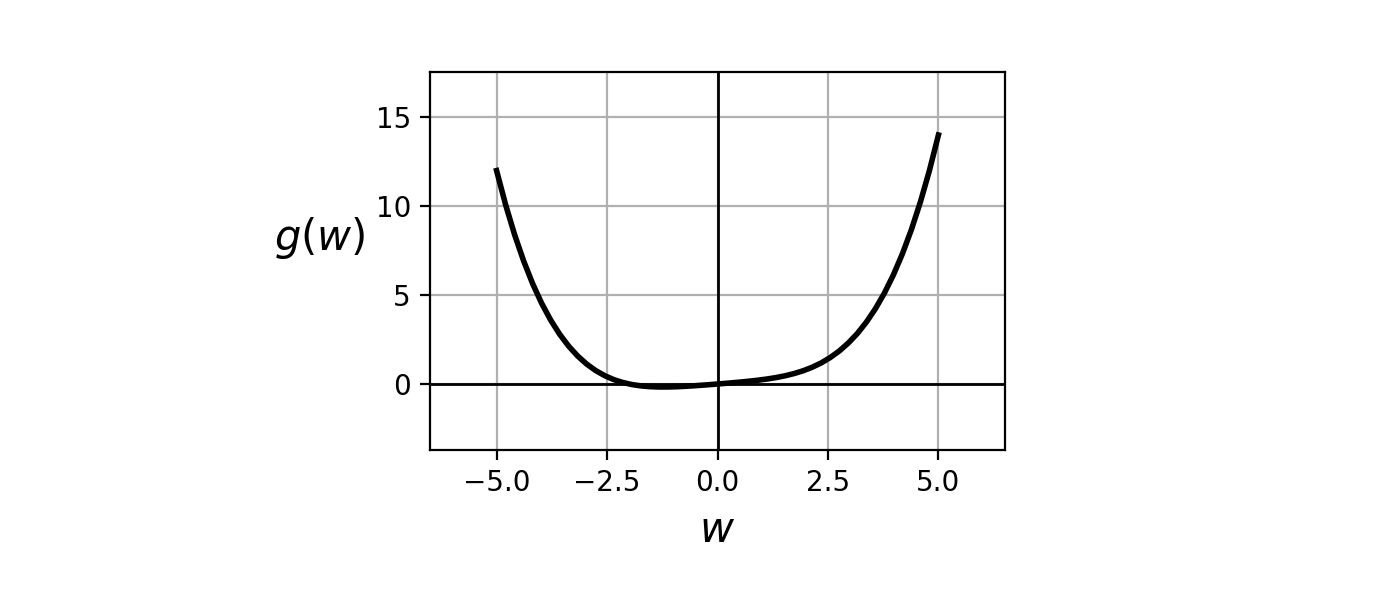

In [7]:
# This code cell will not be shown in the HTML version of this notebook
# specify range of input for our function
w = np.linspace(-5,5,50)
g = lambda w: 1/50*(w**4 + w**2 + 10*w)

# make a table of values for our function
func_table = np.stack((w,g(w)), axis=1)

# use custom plotter to display function
baslib.basics_plotter.single_plot(table = func_table,xlabel = '$w$',ylabel = '$g(w)$',rotate_ylabel = 0)

- The first order system here can be easily computed as 

\begin{equation}
\frac{\mathrm{d}}{\mathrm{d} w}g(w) = \frac{1}{50}\left(4w^3 + 2w + 10\right) = 0
\end{equation}


- This simplifies to

\begin{equation}
2w^3 + w + 5 = 0
\end{equation}

- This has three possible solutions, but the one providing the minimum of the function $g(w)$ is 

\begin{equation}
w = \frac{\sqrt[\leftroot{-2}\uproot{2}3]{\sqrt[\leftroot{-2}\uproot{2}]{2031} - 45}}{6^{\frac{2}{3}}} - \frac{1}{\sqrt[\leftroot{-2}\uproot{2}3]{6\left(\sqrt{2031}-45\right)}}
\end{equation}

which can be computed - after much toil - using [centuries old tricks developed for just such problems](http://mathworld.wolfram.com/CubicFormula.html). 

#### <span style="color:#a50e3e;">Example. </span> Stationary points of a general multi-input  quadratic function

- Take the general multi-input quadratic function

\begin{equation}
g\left(\mathbf{w}\right)=a + \mathbf{b}^{T}\mathbf{w} + \mathbf{w}^{T}\mathbf{C}\mathbf{w}
\end{equation}

where $\mathbf{C}$ is an $N\times N$ symmetric matrix, $\mathbf{b}$ is an $N\times 1$ vector, and $a$ is a scalar.

- Computing the first derivative (gradient) we have

\begin{equation}
\nabla g\left(\mathbf{w}\right)=2\mathbf{C}\mathbf{w}+\mathbf{b}
\end{equation}


- Setting this equal to zero gives a *symmetric and linear* system of equations of the following form whose solutions are stationary points of the original function 

\begin{equation}
\mathbf{C}\mathbf{w}=-\frac{1}{2}\mathbf{b}
\end{equation}

## Coordinate descent and the first order optimality condition

- If we write out the first order system one equation at-a-time we have

\begin{equation}
\begin{array}
\
\frac{\partial}{\partial w_{1}}g(\mathbf{v})=0\\
\frac{\partial}{\partial w_{2}}g(\mathbf{v})=0\\
\,\,\,\,\,\,\,\,\,\,\vdots \\
\frac{\partial}{\partial w_{N}}g(\mathbf{v})=0.
\end{array}
\end{equation}

- While this system cannot often be solved in closed form, a simple idea does lead to numerical approach to approximating it instances where *each individual equation* can be easily solved.

- The idea is this: instead of trying to solve the system of equations *at once* we solve each partial derivative equation *one at-a-time*.


- This is often called *coordinate descent*, since in solving each we move along the coordinate axes coordinate-wise (one at-a-time).

- To perform this coordinate descen we initialize at a point $\mathbf{w}^0$, updating its first coordinate by solving

\begin{equation}
\frac{\partial}{\partial w_{1}}g\left(\mathbf{w}^0\right)=0 
\end{equation}

for the optimal first weight $w_1^{\star}$.  

- We do this again, and again, for each coordinate.

- Continuing this pattern to update the $n^{th}$ weight we solve

\begin{equation}
\frac{\partial}{\partial w_{n}}g\left(\mathbf{w}^{n-1}\right)=0 
\end{equation}

for $w_n^{\star}$, and update the $n^{th}$ weight using this value forming the updated set of weights $\mathbf{w}^n$.  

- After we sweep through all $N$ weights a single time we can refine our solution by sweeping through the weights again.


- At the $k^{th}$ such sweep we update the $n^{th}$ weight by solving the single equation

\begin{equation}
\frac{\partial}{\partial w_{n}}g\left(\mathbf{w}^{k + n-1}\right)=0 
\end{equation}

and update the $n^{th}$ weight of $\mathbf{w}^{k + n-1}$, and so on.

#### <span style="color:#a50e3e;">Example. </span>  Minimizing convex quadratic functions via first order coordinate descent

In [27]:
## This code cell will not be shown in the HTML version of this notebook
def coordinate_descent_for_quadratic(g,w,max_its,a,b,C):
    '''
    Coordinate descent wrapper for general quadratic function. Here
    
    a - a constant
    b - an Nx1 vector
    C - an NxN matrix (symmetric and all nonnegative eigenvalues)
    '''
        
    # record weights and cost history 
    weight_history = [copy.deepcopy(w)]     
    cost_history = [g(w)]
    N = np.size(w)
    
    # outer loop - each is a sweep through every variable once
    for k in range(max_its):
        # inner loop - each is a single variable update
        for n in range(N):
            w[n] = -(np.dot(C[n,:],w) - C[n,n]*w[n] + 0.5*b[n])/float(C[n,n])
            
            # record weights and cost value at each step
            weight_history.append(copy.deepcopy(w))
            cost_history.append(g(w))

    return weight_history,cost_history

- First we use this algorithm to minimize the simple quadratic 

\begin{equation}
g(w_0,w_1) = w_0^2 + w_1^2 + 2
\end{equation}


- We initialize at $\mathbf{w} = \begin{bmatrix} 3 \\ 4 \end{bmatrix}$ and run $1$ iteration of the algorithm - that is all it takes to perfectly minimize the function, as shown below.

<IPython.core.display.Javascript object>


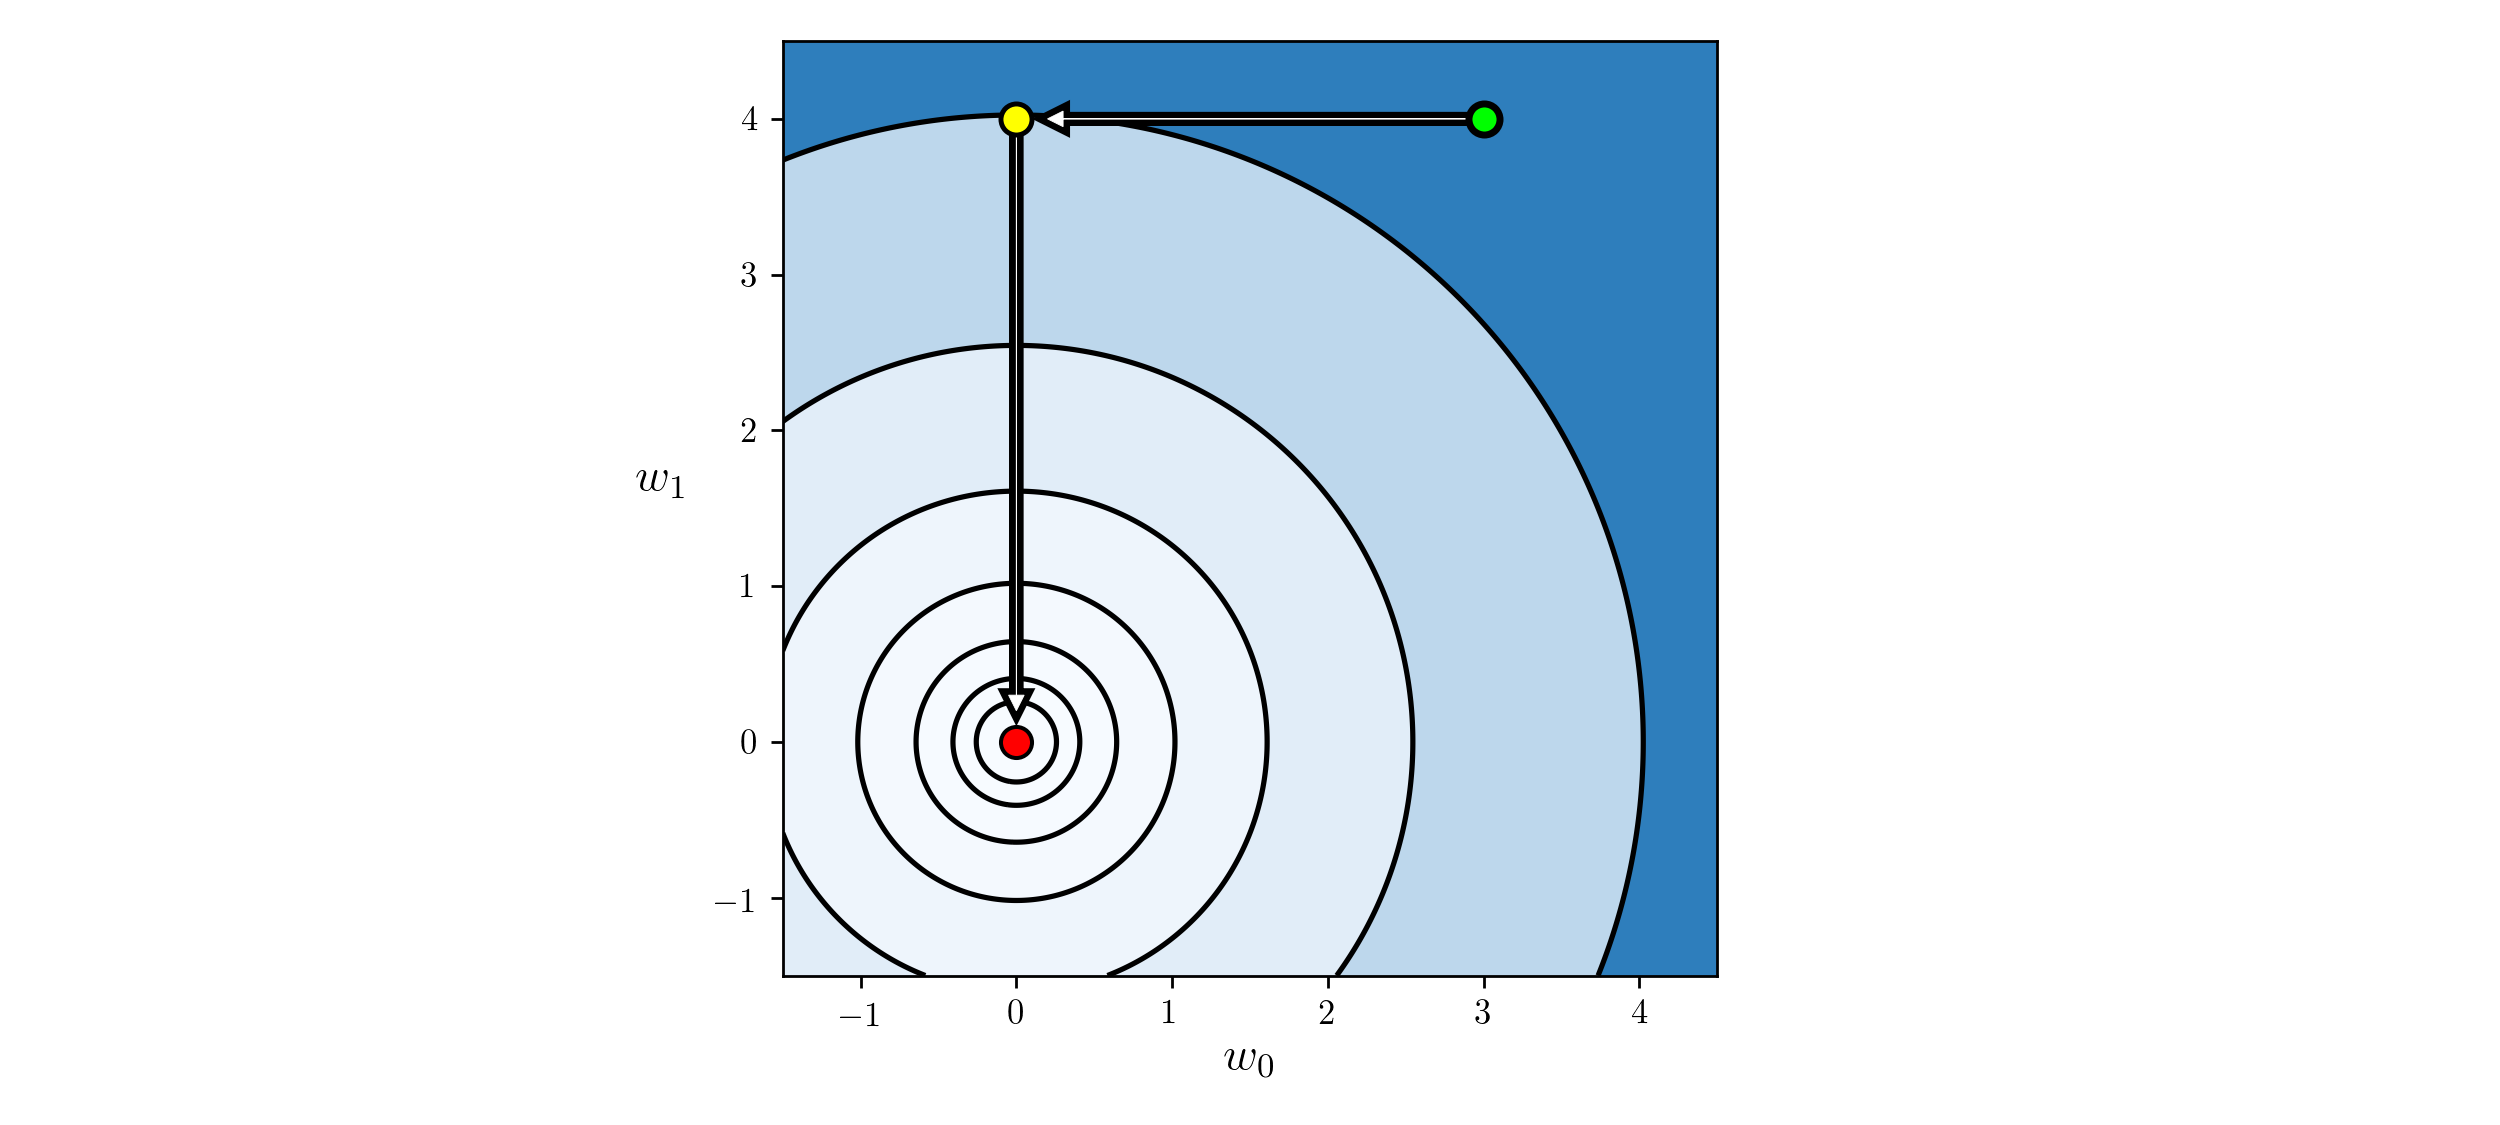

In [29]:
# This code cell will not be shown in the HTML version of this notebook
# define constants for a N=2 input quadratic
a = 2
b = np.zeros((2,1))
C = np.eye(2)

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 1
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

# show run in both three-dimensions and just the input space via the contour plot
static_plotter.two_input_contour_plot(g,weight_history,xmin = -1.5,xmax = 4.5,ymin = -1.5,ymax = 4.5,num_contours = 7,show_original = False)

- Below we show a run of $2$ iterations of the method at the same initial point for the quadratic

\begin{equation}
g(w_0,w_1) = 2w_0^2 + 2w_1^2 + 2w_0w_1 + 20
\end{equation}

<IPython.core.display.Javascript object>


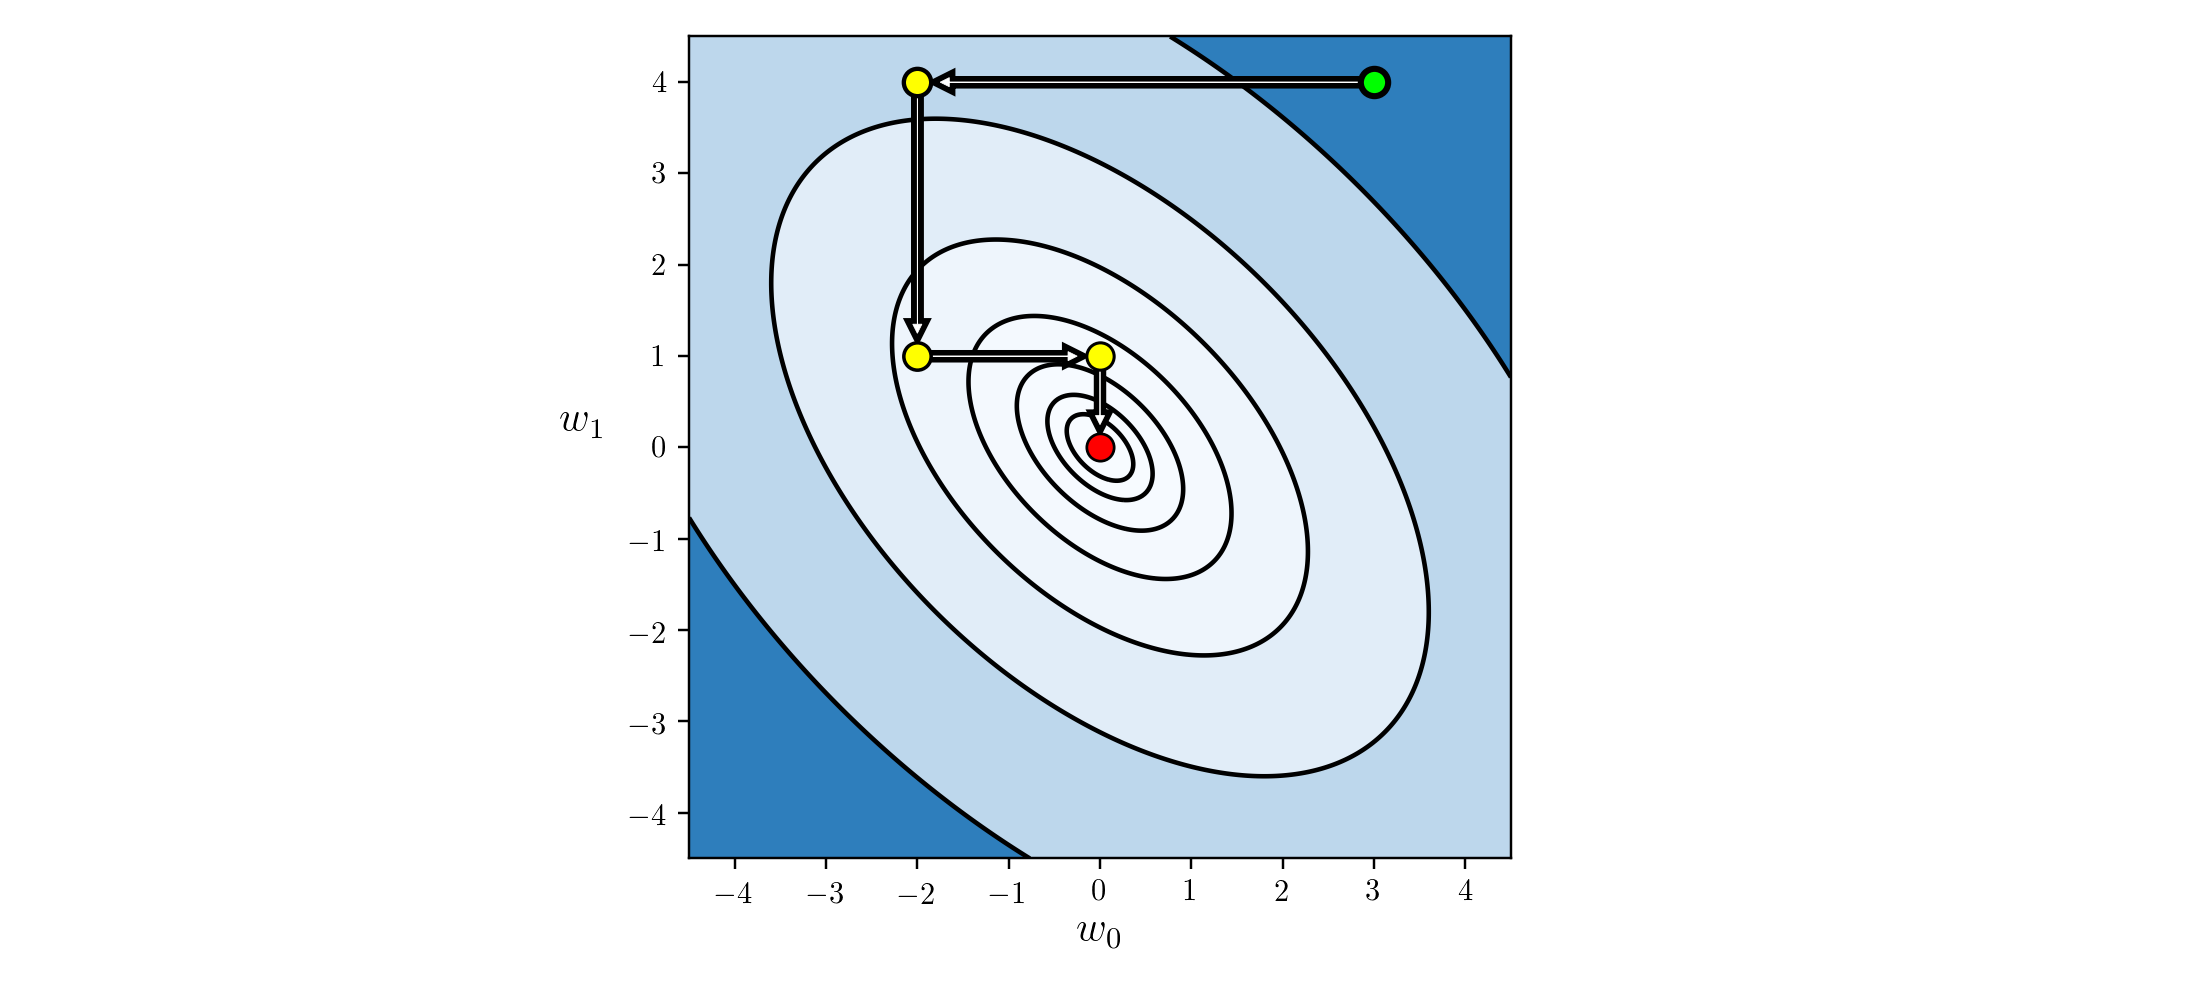

In [33]:
# This code cell will not be shown in the HTML version of this notebook
# define constants for a N=2 input quadratic
a = 20
b = np.zeros((2,1))
C = np.array([[2,1],[1,2]])

# a quadratic function defined using the constants above
g = lambda w: (a + np.dot(b.T,w) + np.dot(np.dot(w.T,C),w))[0]

# initialization
w = np.array([3,4])

# run your alternating descent code
max_its = 2
weight_history,cost_history = coordinate_descent_for_quadratic(g,w,max_its,a,b,C)

# show run in both three-dimensions and just the input space via the contour plot
static_plotter.two_input_contour_plot(g,weight_history,xmin = -4.5,xmax = 4.5,ymin = -4.5,ymax = 4.5,num_contours = 7,show_original = False)

#### <span style="color:#a50e3e;">Example. </span>  Solving systems symmetric equations

- Note how in the previous example the first order system turned out to be *linear*.  


- More specifically, we ended up using coordinate descent to solve simple instances of the symmetric linear system  

\begin{equation}
\mathbf{C}\mathbf{w} = - \frac{1}{2}\mathbf{b}.
\end{equation}


which generates a convex quadratic (i.e., when $\mathbf{C}$ is positive semi-defininte).

- Indeed more generally, this coordinate descent method is one very popular way of solving such systems in general.